In [61]:
import pandas as pd
df_1 = pd.read_csv("/Data Science/Data Scientist Intern @Home Credit Indonesia/Task 2 - HCI Previous Application.csv")
df_2 = pd.read_csv("/Data Science/Data Scientist Intern @Home Credit Indonesia/Task 2 - HCI Application.csv")

Ket: df_1 adalah dataframe yang berisi data pengajuan pinjaman, sedangkan df_2 adalah dataframe yang berisi informasi setiap SK_ID_CURR yang mengajukan pinjaman

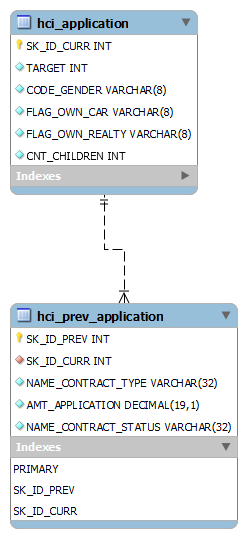

#### Gabungkan df_1 dan df_2 dengan LEFT JOIN

In [62]:
df = pd.merge(df_1, df_2, on="SK_ID_CURR", how="left")

print("Ukuran awal df_1: {}".format(df_1.shape))
print("Ukuran awal df_2: {}".format(df_2.shape))
print("Ukuran df hasil LEFT JOIN df_1 dan df_2: {}".format(df.shape))

Ukuran awal df_1: (113697, 5)
Ukuran awal df_2: (23714, 6)
Ukuran df hasil LEFT JOIN df_1 dan df_2: (113697, 10)


# EXPLORATORY DATA ANALYSIS

#### Column Description

1. SK_ID_CURR : ID of loan in our sample
2. TARGET : Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
3. CODE_GENDER : Gender of the client
4. FLAG_OWN_CAR : Flag if the client owns a car
5. FLAG_OWN_REALTY : Flag if client owns a house or flat
6. CNT_CHILDREN : Number of children the client has
7. SK_ID_PREV : ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)
8. SK_ID_CURR : ID of loan in our sample
9. NAME_CONTRACT_TYPE : Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application
10. AMT_APPLICATION : For how much credit did client ask on the previous application
11. NAME_CONTRACT_STATUS : Contract status (approved, cancelled, ...) of previous application

#### Mengecek 5 data teratas dan 5 data terbawah df

In [63]:
df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,NAME_CONTRACT_STATUS,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN
0,1038818,100002,Consumer loans,179055.0,Approved,1,F,N,Y,0
1,1810518,100003,Cash loans,900000.0,Approved,0,F,N,N,0
2,2636178,100003,Consumer loans,337500.0,Approved,0,F,N,N,0
3,2396755,100003,Consumer loans,68809.5,Approved,0,F,N,N,0
4,1564014,100004,Consumer loans,24282.0,Approved,0,F,Y,Y,0
...,...,...,...,...,...,...,...,...,...,...
113692,1945667,129072,Consumer loans,32130.0,Approved,0,F,N,Y,1
113693,2485785,129075,Consumer loans,39231.0,Approved,0,M,Y,Y,1
113694,2351820,129075,Consumer loans,45315.0,Unused offer,0,M,Y,Y,1
113695,2366713,129075,Consumer loans,28440.0,Approved,0,M,Y,Y,1


#### Mengecek missing value dan tipe data dari setiap kolom

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113697 entries, 0 to 113696
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SK_ID_PREV            113697 non-null  int64  
 1   SK_ID_CURR            113697 non-null  int64  
 2   NAME_CONTRACT_TYPE    113697 non-null  object 
 3   AMT_APPLICATION       113697 non-null  float64
 4   NAME_CONTRACT_STATUS  113697 non-null  object 
 5   TARGET                113697 non-null  int64  
 6   CODE_GENDER           113697 non-null  object 
 7   FLAG_OWN_CAR          113697 non-null  object 
 8   FLAG_OWN_REALTY       113697 non-null  object 
 9   CNT_CHILDREN          113697 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 9.5+ MB


#### Mengecek unique value dari beberapa kolom

In [66]:
col_check = ["NAME_CONTRACT_TYPE", "NAME_CONTRACT_STATUS", "TARGET",
             "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN"]

for col in col_check:
    print("Unique value dari kolom {} -> {}".format(col, df[col].unique()))

Unique value dari kolom NAME_CONTRACT_TYPE -> ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
Unique value dari kolom NAME_CONTRACT_STATUS -> ['Approved' 'Canceled' 'Refused' 'Unused offer']
Unique value dari kolom TARGET -> [1 0]
Unique value dari kolom CODE_GENDER -> ['F' 'M']
Unique value dari kolom FLAG_OWN_CAR -> ['N' 'Y']
Unique value dari kolom FLAG_OWN_REALTY -> ['Y' 'N']
Unique value dari kolom CNT_CHILDREN -> [0 1 2 3 4 7 5 6 8 9]


#### Melihat Summary Statistics

In [67]:
df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,TARGET,CNT_CHILDREN
count,1.136970e+05,113697.000000,1.136970e+05,113697.000000,113697.000000
mean,1.920334e+06,114510.453073,1.778993e+05,0.086774,0.408357
std,5.328807e+05,8421.431015,2.983279e+05,0.281506,0.717586
min,1.000045e+06,100002.000000,0.000000e+00,0.000000,0.000000
25%,1.459920e+06,107217.000000,2.025000e+04,0.000000,0.000000
50%,1.917834e+06,114553.000000,7.154100e+04,0.000000,0.000000
75%,2.381625e+06,121761.000000,1.812915e+05,0.000000,1.000000
max,2.845378e+06,129076.000000,4.185000e+06,1.000000,9.000000


In [68]:
df.describe(include="object")

,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
count,113697,113697,113697,113697,113697
unique,4,4,2,2,2
top,Cash loans,Approved,F,N,Y
freq,51308,71499,90347,75309,82376


# CASE

#### 1. Berapa banyak pengajuan kredit yang disetujui dari pelanggan wanita yang memiliki anak dan tidak memiliki masalah/kesulitan dalam proses pembayaran (TARGET = 0)? 

In [69]:
case1 = df.loc[(df["NAME_CONTRACT_STATUS"]=="Approved") & (df["CODE_GENDER"]=="F") &
               (df["CNT_CHILDREN"]>0) & (df["TARGET"]==0)]

print("""
Banyak pengajuan kredit yang disetujui dari pelanggan wanita yang memiliki anak dan tidak memiliki masalah/kesulitan
dalam proses pembayaran adalah : {} pengajuan kredit
""".format(len(case1)))


Banyak pengajuan kredit yang disetujui dari pelanggan wanita yang memiliki anak dan tidak memiliki masalah/kesulitan
dalam proses pembayaran adalah : 15637 pengajuan kredit



#### 2. Tipe kontrak (NAME_CONTRACT_TYPE) apa yang memiliki pengajuan kredit yang paling banyak disetujui dari pelanggan wanita yang memiliki anak dan tidak memiliki masalah/kesulitan dalam proses pembayaran (TARGET = 0)?

In [70]:
case1.groupby(by="NAME_CONTRACT_TYPE").count()[["SK_ID_PREV"]]

,SK_ID_PREV
NAME_CONTRACT_TYPE,
Cash loans,3646
Consumer loans,10585
Revolving loans,1406


In [71]:
print("""
Tipe kontrak (NAME_CONTRACT_TYPE) yang memiliki pengajuan kredit yang paling banyak disetujui dari pelanggan wanita
yang memiliki anak dan tidak memiliki masalah/kesulitan dalam proses pembayaran adalah Consumer loans
""")


Tipe kontrak (NAME_CONTRACT_TYPE) yang memiliki pengajuan kredit yang paling banyak disetujui dari pelanggan wanita
yang memiliki anak dan tidak memiliki masalah/kesulitan dalam proses pembayaran adalah Consumer loans



#### 3. Berapa banyak pengajuan kredit yang disetujui dari pelanggan wanita yang memiliki anak dan tidak memiliki masalah/kesulitan dalam proses pembayaran (TARGET = 0) untuk tipe kontrak pada soal nomor 2?

In [72]:
print("""
banyak pengajuan kredit yang disetujui dari pelanggan wanita yang memiliki anak dan tidak memiliki masalah/kesulitan dalam
proses pembayaran (TARGET = 0) untuk tipe kontrak pada soal nomor 2 adalah : 10585 pengajuan kredit
""")


banyak pengajuan kredit yang disetujui dari pelanggan wanita yang memiliki anak dan tidak memiliki masalah/kesulitan dalam
proses pembayaran (TARGET = 0) untuk tipe kontrak pada soal nomor 2 adalah : 10585 pengajuan kredit



#### 4. Tipe kontrak (NAME_CONTRACT_TYPE) apa yang memiliki pengajuan kredit yang paling banyak disetujui kedua dari pelanggan wanita yang memiliki anak dan tidak memiliki masalah/kesulitan dalam proses pembayaran (TARGET = 0)

In [75]:
print("""
Tipe kontrak (NAME_CONTRACT_TYPE) yang memiliki pengajuan kredit yang paling banyak disetujui kedua dari pelanggan wanita
yang memiliki anak dan tidak memiliki masalah/kesulitan dalam proses pembayaran adalah Cash loans
""")


Tipe kontrak (NAME_CONTRACT_TYPE) yang memiliki pengajuan kredit yang paling banyak disetujui kedua dari pelanggan wanita
yang memiliki anak dan tidak memiliki masalah/kesulitan dalam proses pembayaran adalah Cash loans



#### 5. Berapa banyak pengajuan kredit yang disetujui dari pelanggan wanita yang memiliki anak dan tidak memiliki masalah/kesulitan dalam proses pembayaran (TARGET = 0) untuk tipe kontrak pada soal nomor 4?

In [76]:
print("""
banyak pengajuan kredit yang disetujui dari pelanggan wanita yang memiliki anak dan tidak memiliki masalah/kesulitan dalam
proses pembayaran (TARGET = 0) untuk tipe kontrak pada soal nomor 4 adalah : 3646 pengajuan kredit
""")


banyak pengajuan kredit yang disetujui dari pelanggan wanita yang memiliki anak dan tidak memiliki masalah/kesulitan dalam
proses pembayaran (TARGET = 0) untuk tipe kontrak pada soal nomor 4 adalah : 3646 pengajuan kredit



#### 6. Berapa banyak pelanggan wanita yang memiliki anak dan tidak memiliki kesulitan pembayaran dan memiliki sejarah pengajuan pinjaman yang disetujui minimal sebanyak 3 kali untuk jenis kontrak paling diminati (jawaban nomor 2)?

In [88]:
case2 = df.loc[(df["NAME_CONTRACT_STATUS"]=="Approved") & (df["CODE_GENDER"]=="F") &
               (df["CNT_CHILDREN"]>0) & (df["TARGET"]==0) & (df["NAME_CONTRACT_TYPE"]=="Consumer loans")]

case2 = case2.groupby(by="SK_ID_CURR").count()[["SK_ID_PREV"]]

In [90]:
#Mengecek 5 data teratas dan 5 data terbawah
case2

,SK_ID_PREV
SK_ID_CURR,
100009,7
100014,2
100025,3
100026,1
100029,1
...,...
129052,3
129054,2
129065,2


In [97]:
#Mengecek SK_ID_CURR (pelanggan) yang disetujui minimal sebanyak 3 kali
case2.loc[case2["SK_ID_PREV"]>=3]

,SK_ID_PREV
SK_ID_CURR,
100009,7
100025,3
100059,3
100069,5
100087,3
...,...
129011,3
129016,8
129044,4


In [96]:
print("""
banyak pelanggan wanita yang memiliki anak dan tidak memiliki kesulitan pembayaran dan memiliki sejarah pengajuan pinjaman
yang disetujui minimal sebanyak 3 kali untuk jenis kontrak paling diminati (jawaban nomor 2) adalah sebanyak 1456 orang
""")


banyak pelanggan wanita yang memiliki anak dan tidak memiliki kesulitan pembayaran dan memiliki sejarah pengajuan pinjaman
yang disetujui minimal sebanyak 3 kali untuk jenis kontrak paling diminati (jawaban nomor 2) adalah sebanyak 1456 orang

